# Tapped Delay Line

A tapped delay line (TDL) is a delay line with at least one "tap". A delay-line tap extracts a signal output from somewhere within the delay line, optionally scales it, and usually sums with other taps for form an output signal. A tap may be interpolating or non-interpolating. A non-interpolating tap extracts the signal at some fixed integer delay relative to the input. Thus, a tap implements a shorter delay line within a larger one

The "early reflections" portion of the impulse response of a reverberant environment is often taken to be the first 100ms or so. However, for greater accuracy, it should be extended to the time at which the reverberation reaches its asymptotic statistical behavior.

Since the early reflections are relatively sparse and span a relatively short time, they are often implemented using tapped delay lines.

Algorithm could be drew as


<img align="center" width=50% src="tapped_delay_line.png" alt>


The total delay line length is $ M_3$ samples, and the internal taps are located at delays of $ M_1$ and $ M_2$ samples, respectively. The output signal is a linear combination of the input signal $ x(n)$, the delay-line output $ x(n-M_3)$, and the two tap signals $ x(n-M_1)$ and $ x(n-M_2)$. 

The difference equation of the TDL by inspection is

$$y(n) = b_0 x(n) + b_{M_1} x(n-M_1) + b_{M_2} x(n-M_2) + b_{M_3} x(n-M_3)$$

corresponding to the transfer function

$$H(z) = b_0 + b_{M_1} z^{-M_1} + b_{M_2} z^{-M_2} + b_{M_3} z^{-M_3}$$



In [1]:
from math import pi
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

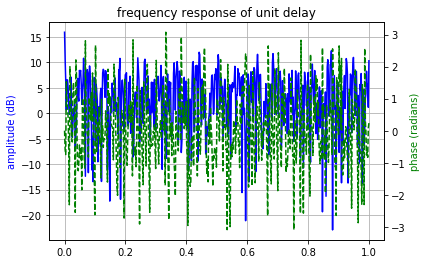

In [2]:
sr = 44100

time = np.array([0.0000, 0.0043, 0.0215, 0.0225, 0.0268, 
                 0.0270, 0.0298, 0.0458, 0.0485, 0.0572,
                 0.0587, 0.0595, 0.0612, 0.0707, 0.0708,
                 0.0726, 0.0741, 0.0753, 0.0797])

gain = np.array([1.000, 0.841, 0.504, 0.491, 0.379,
                 0.380, 0.346, 0.289, 0.272, 0.192,
                 0.193, 0.217, 0.181, 0.180, 0.181,
                 0.176, 0.142, 0.167, 0.134])

sample = np.around(time*sr).astype(int)

numerator = np.zeros(int(sample[-1])+1)
denominator = 1

for i in range(0, len(sample)):
    numerator[sample[i]] = gain[i]

w, h = scipy.signal.freqz(numerator, denominator)
amp = 20 * np.log10(abs(h))
deg = np.angle(h)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of unit delay')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amp, 'b')
ax1.set_ylabel('amplitude (dB)', color='b')
ax1.grid()

ax2.plot(w/max(w), deg, 'g--')
ax2.set_ylabel('phase (radians)', color='g')

plt.show()

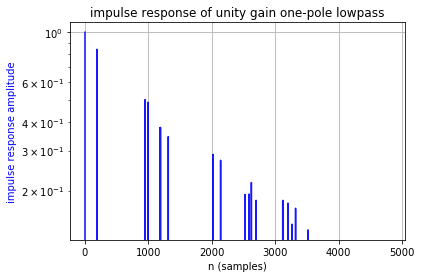

In [3]:
x_axis = np.arange(4800)
impulse = np.zeros(4800)
impulse[0] = 1.0

impulse_response = scipy.signal.lfilter(numerator, denominator, impulse)

plt.title('impulse response of unity gain one-pole lowpass')
plt.plot(x_axis, impulse_response, color='b', alpha=0.9)
plt.ylabel('impulse response amplitude', color='b')
plt.xlabel('n (samples)')
plt.yscale("log")
plt.grid()
plt.show()

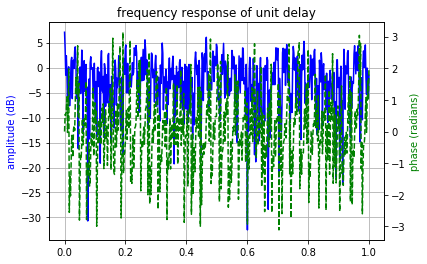

In [4]:
sample = np.array([0, 955, 1055, 1699, 1867, 1987, 3055, 3321])

gain = np.array([0.5, 0.45, 0.06, 0.4, 0.3, 0.3, 0.13, 0.12])

numerator = np.zeros(int(sample[-1])+1)
denominator = 1

for i in range(0, len(sample)):
    numerator[sample[i]] = gain[i]


w, h = scipy.signal.freqz(numerator, denominator)
amp = 20 * np.log10(abs(h))
deg = np.angle(h)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title('frequency response of unit delay')
plt.xlabel(r'normalized frequency (x$\pi$rad/sample)')

ax1.plot(w/max(w), amp, 'b')
ax1.set_ylabel('amplitude (dB)', color='b')
ax1.grid()

ax2.plot(w/max(w), deg, 'g--')
ax2.set_ylabel('phase (radians)', color='g')

plt.show()

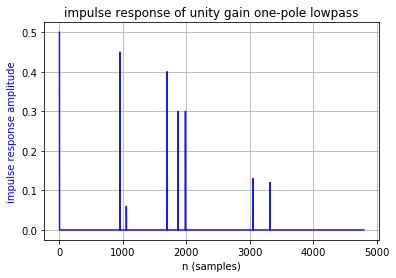

In [5]:
x_axis = np.arange(4800)
impulse = np.zeros(4800)
impulse[0] = 1.0

impulse_response = scipy.signal.lfilter(numerator, denominator, impulse)

plt.title('impulse response of unity gain one-pole lowpass')
plt.plot(x_axis, impulse_response, color='b', alpha=0.9)
plt.ylabel('impulse response amplitude', color='b')
plt.xlabel('n (samples)')
plt.grid()
plt.show()